# Delay Distribution vs. Fronthaul Load

This experiment analyzes datasets collected under varying fronthaul (FH) bitrates (or loads). It was acquired over 4 hops with 1 BBU serving a single RRU.

In [1]:
import sys, os, pprint, time
sys.path.append(os.path.abspath('../'))
import argparse, logging, sys
import ptp.reader
import ptp.ls
import ptp.metrics
import ptp.frequency
import ptp.pktselection
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline
%load_ext autoreload
%autoreload 2

The datasets collected for the experiment were placed at directory `delay_vs_load_tests`:

In [2]:
dataset_path = "../data/delay_vs_load_tests" 
datasets     = [f for f in sorted(glob.glob(dataset_path + "**/*.json"))]

Load each of these datasets and plot:

- Delay histogram (with master-to-slave and slave-to-master delays)
- Delay vs time (separately for master-to-slave and slave-to-master delays)
- RRU occupancy 

The goal with the occupancy plot is to make sure that the FH traffic remained alive throughout the capture.

========== Dataset: serial-20190827-114858.json ==========
Bitrate:
{'dl': 111360000.0, 'ul': 111360000.0}


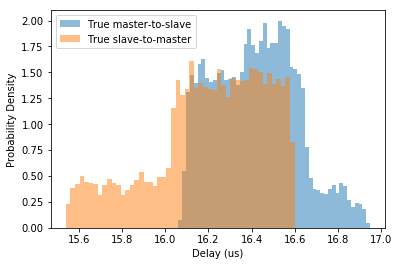

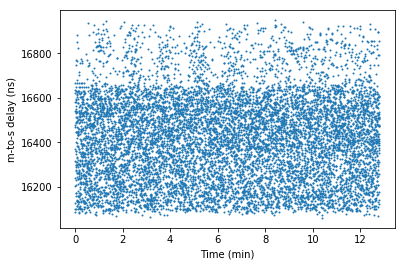

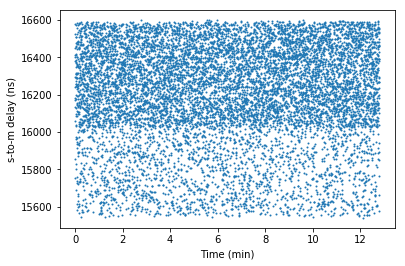

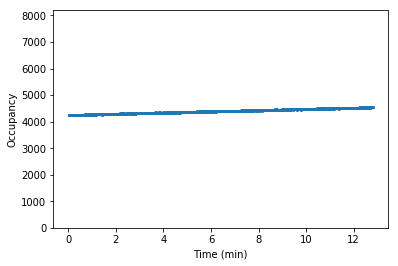

========== Dataset: serial-20190827-120709.json ==========
Bitrate:
{'dl': 172800000.0, 'ul': 172800000.0}


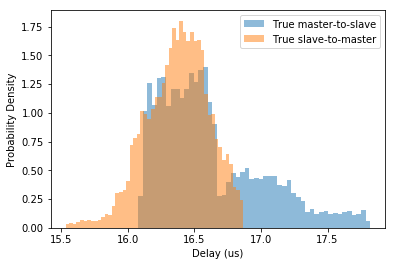

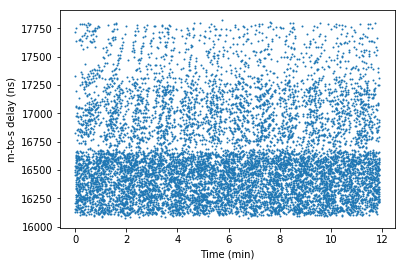

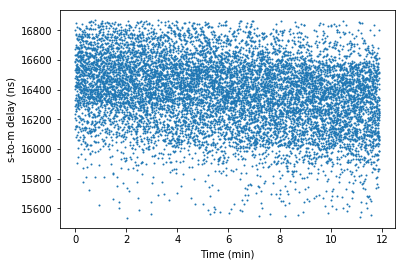

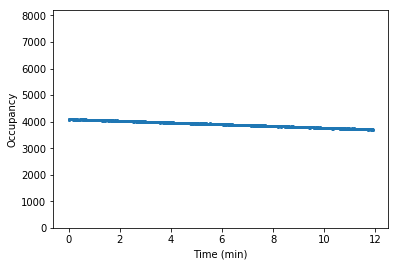

========== Dataset: serial-20190827-122523.json ==========
Bitrate:
{'dl': 234240000.0, 'ul': 234240000.0}


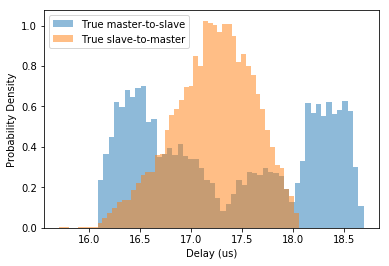

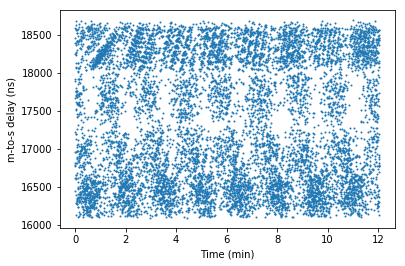

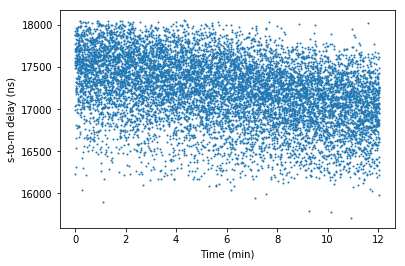

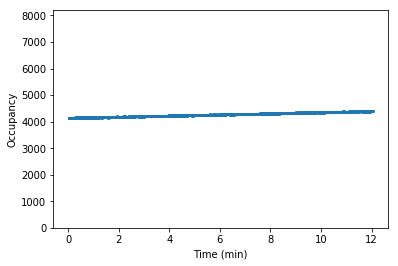

========== Dataset: serial-20190827-124042.json ==========
Bitrate:
{'dl': 295680000.0, 'ul': 295680000.0}


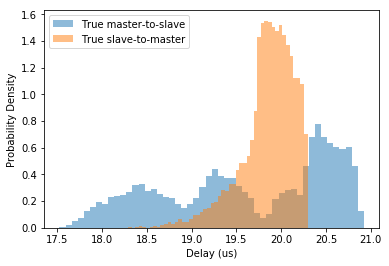

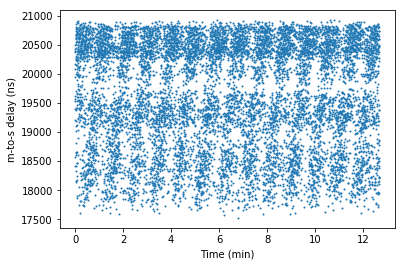

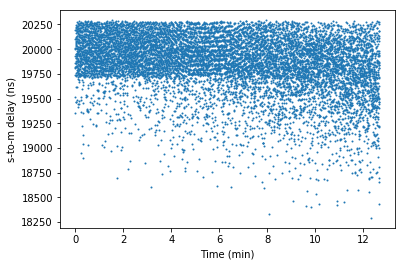

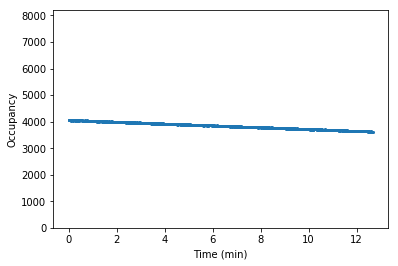

========== Dataset: serial-20190827-130114.json ==========
Bitrate:
{'dl': 357120000.0, 'ul': 357120000.0}


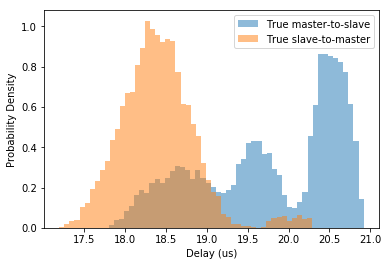

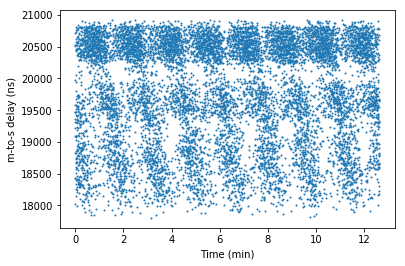

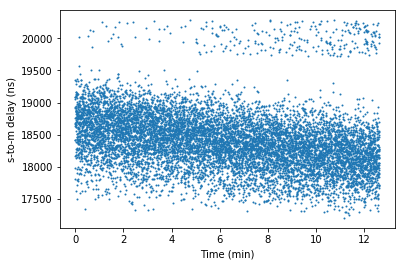

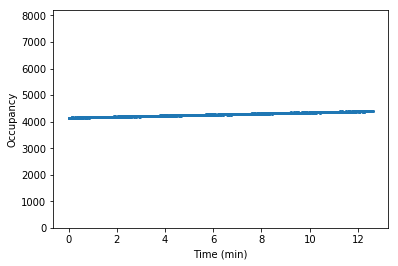

========== Dataset: serial-20190827-134130.json ==========
Bitrate:
{'dl': 418560000.0, 'ul': 418560000.0}


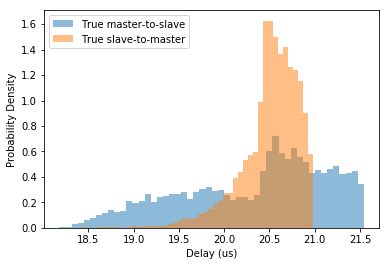

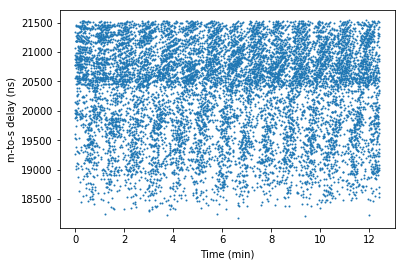

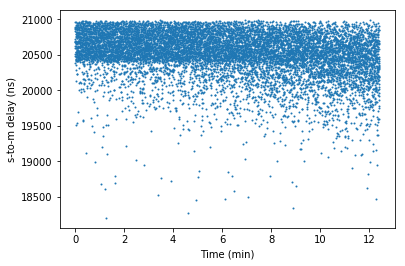

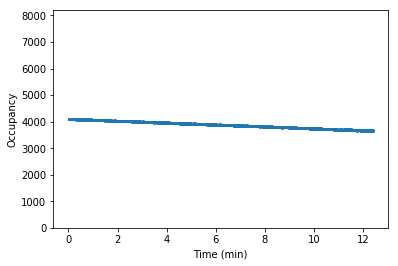

========== Dataset: serial-20190827-135808.json ==========
Bitrate:
{'dl': 480000000.0, 'ul': 480000000.0}


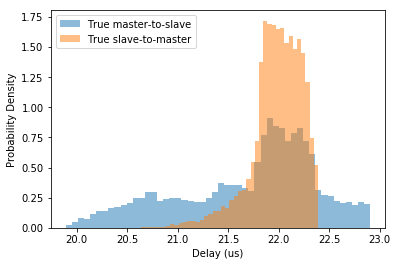

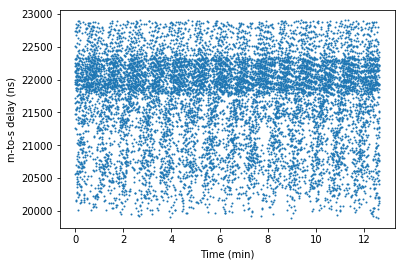

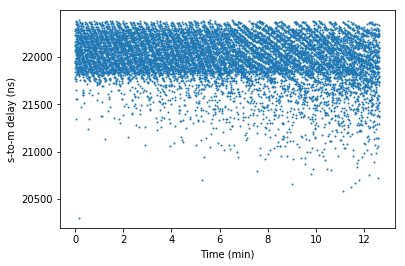

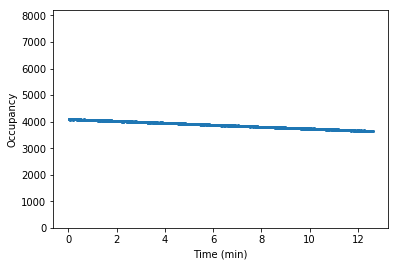

========== Dataset: serial-20190827-145019.json ==========
Bitrate:
{'dl': 541440000.0, 'ul': 541440000.0}


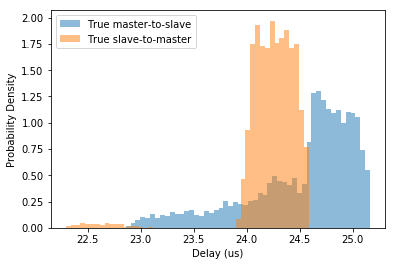

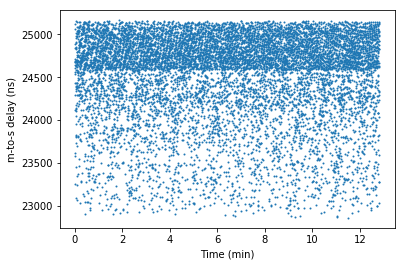

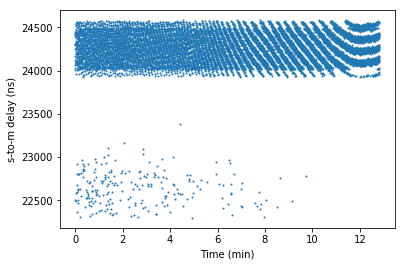

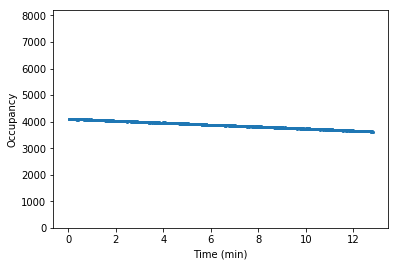

In [3]:
for dataset in datasets:
    reader = ptp.reader.Reader(dataset)
    reader.run()
    print("========== Dataset: %s ==========" %(os.path.basename(dataset)))
    print("Bitrate:")
    pprint.pprint(reader.metadata["fh_traffic"]["bitrate"])
    # PTP analyser
    analyser = ptp.metrics.Analyser(reader.data)
    analyser.plot_delay_hist(show_raw=False, save=False)
    analyser.plot_delay_vs_time(split=True, save=False)
    analyser.plot_occupancy(save=False)